# Convolutional Neural Network 

The purpose of this project is to create a digit recognition model by using sequential convolutional neural network trained on MNIST dataset. Furthermore, it is sought that the model can improve after the first training by adding layers or changing the size of the input to compare wich model is better.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation



In [3]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

df_train.tail(5)


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[5 rows x 785 columns]

In order to visualize the given information it is necessary to use plt from Matplotlib to get the current image from the label. The first step is to reshape the data to 28x28 pixels and define a plot range. 

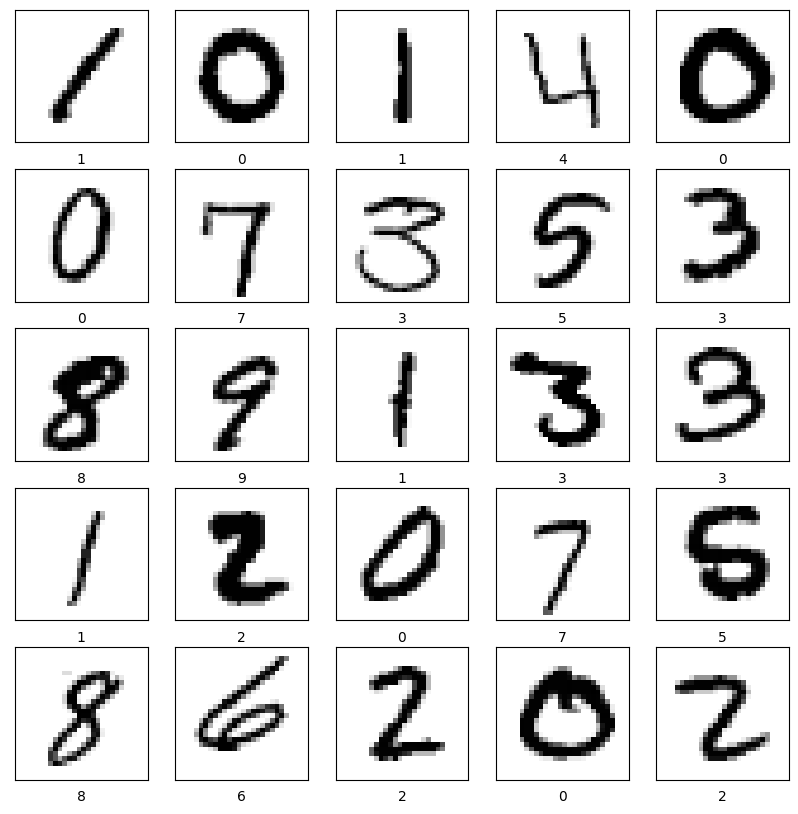

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df_train.iloc[i,1:].values.reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(df_train.iloc[i,0])
plt.show()



## Implementation of the first CNN Model 

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split


We reshape the data to fit model with 4 dimensions (batch_size, height, width, channels) 
<ul>
  <li>batch_size is the number of samples that going to be propagated through the network</li>
  <li>height and width are the dimensions of the image</li>
  <li>channels is the number of color channels in the image. For grayscale images, the channels is 1. For RGB images, the channels is 3</li>
</ul>



In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('label', axis=1), df_train['label'], test_size=0.2, random_state=42)

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In this project we can implement a few different types of models. But we will start with a basic one, named as sequential model. The main reason for using this type of model is because it is easy to  add layers one after another 


In [7]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1050/1050 [==============================] - 19s 16ms/step - loss: 1.8253 - accuracy: 0.9229 - val_loss: 0.1406 - val_accuracy: 0.9629
Epoch 2/3
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0675 - accuracy: 0.9802 - val_loss: 0.1687 - val_accuracy: 0.9575
Epoch 3/3
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0517 - accuracy: 0.9843 - val_loss: 0.1851 - val_accuracy: 0.9594


To measure the performance of the model is neccesary to use the method compile to oversee the training process. As we could se the results are not good enough, so we will try to improve the model by adding more layers.

This function is used to plot the confusion matrix for the model:

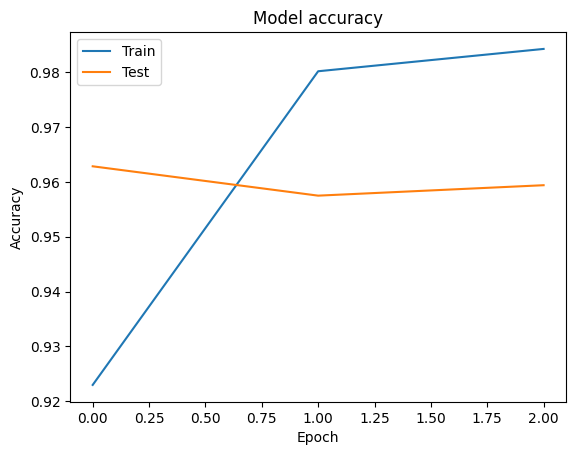

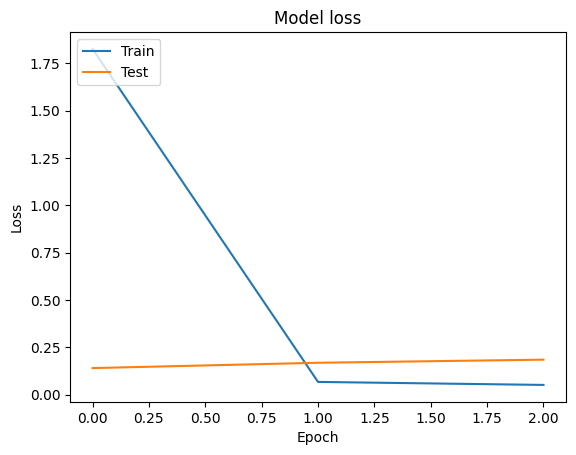

In [8]:

def learningCurve(model):
    # Plot training & validation accuracy values
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

learningCurve(history) 

On this plot we can see that the model is overfitting, so we will add some dropout layers to reduce overfitting by redoing the model with more hidden layers.

## Implementation of the second CNN Model 

<ol>
  <li>First we add a convolutional layer with 64 filters, a kernel size of 3, and a relu activation function. This will help us extract features from the image.</li>
  <li>Then we add another convolutional layer with 32 filters, a kernel size of 3, and a relu activation function for the same reason as above.</li>
  <li>Then we add a max pooling layer with a pool size of 2x2 to reduce the dimensionality of each feature map.</li>
  <li>We add a dropout layer with a dropout rate of 0.25 to prevent overfitting.</li>
  <li>We flatten the model to prepare it for the dense layer.</li>
  <li>We add a dense layer with 10 neurons and a softmax activation function to classify the images into 10 classes</li>
</ol>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('label', axis=1), df_train['label'], test_size=0.2, random_state=42)

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)



Epoch 1/3
1050/1050 [==============================] - 49s 46ms/step - loss: 0.3992 - accuracy: 0.9236 - val_loss: 0.0909 - val_accuracy: 0.9717
Epoch 2/3
1050/1050 [==============================] - 51s 48ms/step - loss: 0.1056 - accuracy: 0.9675 - val_loss: 0.0778 - val_accuracy: 0.9761
Epoch 3/3
1050/1050 [==============================] - 48s 46ms/step - loss: 0.0793 - accuracy: 0.9756 - val_loss: 0.0765 - val_accuracy: 0.9788


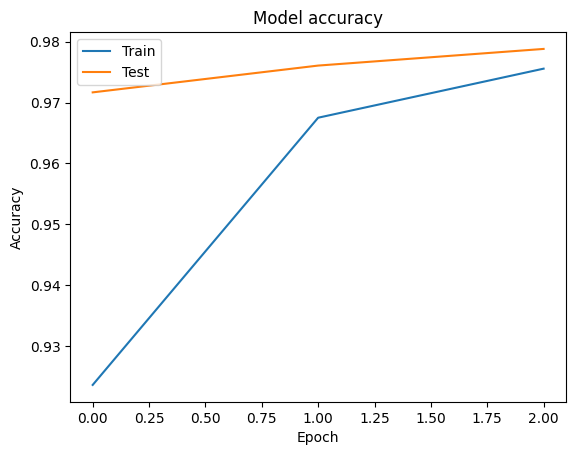

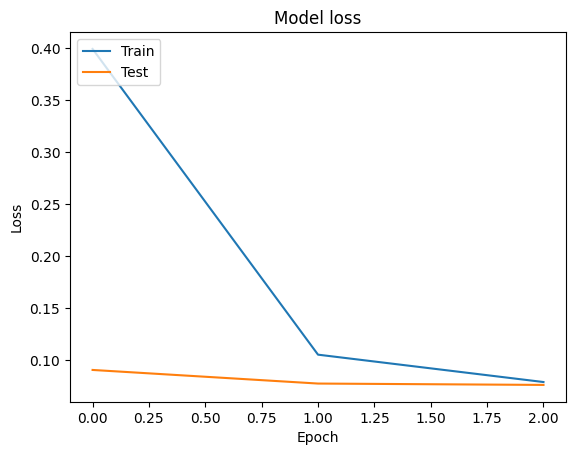

In [11]:
learningCurve(history)

As we can see the accuracy is better than the previous model and the loss is lower. The plot shows that the model is not overfitting the data and the model is learning. 

263/263 [==============================] - 2s 9ms/step


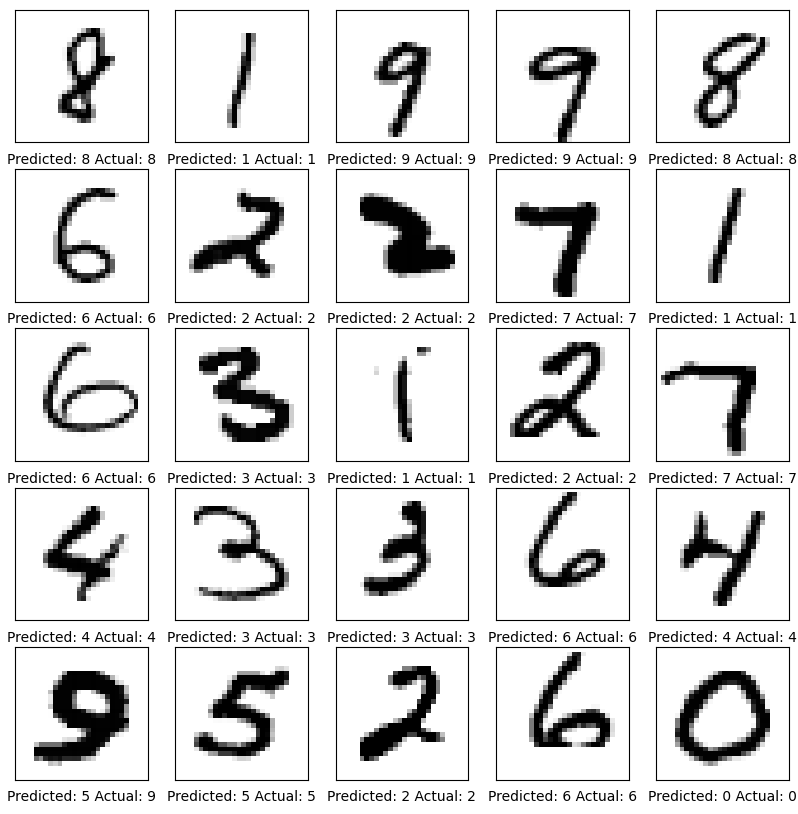

In [22]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {y_pred[i]} Actual: {y_test[i]}")
plt.show()